# Welcome to the Live EDA Demo

This demo extends what we've covered about python and also introduces the basics of some other essential library's such as pandas. This guide should act as a simplification of the kind of notebook you will produce through your project.

# Importing Data & Cleaning

In [2]:
import pandas as pd

<b> Pandas is the package you will be learning next. It's used for accessing and modifying datasets. For now we will just use it to open our 'games' dataset and print </b>

In [3]:
df = pd.read_csv('../data/games/games.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# df = pd.read_csv('_____.tab', sep='\t') --> Needed for household dataset tab files
df2 = pd.read_csv('../data/games/example.tab', sep='\t')
df2.head()

,Name,Price
0,Apple,3.3
1,Banana,1.3


<b> Pandas allows us to open a csv/tab file and save it as a dataframe (called 'df'). This is extremely useful as it will mostly organise the data as we want, and allows us to easily get columns/rows. df.head() is used to print the top of the table just to have a quick peek. </b>

In [5]:
print(df.shape[0])

16598


<b> Shape tells us its structure. This dataset has 16598 rows and 11 columns. </b>

In [6]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


<b> dtypes tells us datatypes of the columns </b>

In [7]:
print(df.loc[0])

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object


<b> Using df.loc (locate) gets row data by index, so here we've selected the first row and printed out all of its detials </b>

In [8]:
for i in range(0, 20):
    print(df.loc[i]["Genre"])

Sports
Platform
Racing
Sports
Role-Playing
Puzzle
Platform
Misc
Platform
Shooter
Simulation
Racing
Role-Playing
Sports
Sports
Misc
Action
Action
Platform
Misc


<b> Above is a basic example of iterating through rows in our data. At each iteration we've used df.loc[i] to get the current row's data, and then specify we only want "Genre" returned. Through learning pandas you will find more efficient ways of doing this</b>

In [9]:
for i in range(0, df.shape[0]):
    if df.loc[i]["Genre"] == "Misc":
        df.drop(i, inplace=True)

In [10]:
print(df["Genre"])

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
5              Puzzle
6            Platform
8            Platform
9             Shooter
10         Simulation
11             Racing
12       Role-Playing
13             Sports
14             Sports
16             Action
17             Action
18           Platform
20       Role-Playing
21           Platform
22           Platform
23             Action
24             Action
25       Role-Playing
26       Role-Playing
27             Puzzle
28             Racing
29            Shooter
30       Role-Playing
31            Shooter
32       Role-Playing
             ...     
16568          Puzzle
16569         Shooter
16570      Simulation
16571       Adventure
16572       Adventure
16573          Racing
16574          Racing
16575       Adventure
16576          Sports
16577         Shooter
16578          Sports
16579          Sports
16580       Adventure
16581          Sports
16582     

<b> Above we use drop in the loop to remove any games with a "Misc" game category. It is a simple (and by no means the most effiencent way) of removing rows based on a check </b>

<b> You'll have to do a lot more cleaning than this so follow the codecademy pandas closely to learn how to use it more effectively and efficiently than this </b>

# Analysing data

Once your data is clean and you've set up your dataframe for analysis, begin testing and further understanding your data

In [11]:
platforms = dict(df["Platform"].value_counts())
print(platforms)

{'PS2': 1939, 'DS': 1770, 'PS3': 1205, 'X360': 1139, 'PS': 1120, 'PSP': 1107, 'Wii': 1045, 'PC': 936, 'XB': 778, 'GBA': 712, 'GC': 520, '3DS': 456, 'PSV': 389, 'PS4': 321, 'N64': 301, 'SNES': 222, 'XOne': 198, 'SAT': 158, '2600': 128, 'WiiU': 122, 'NES': 96, 'GB': 90, 'DC': 52, 'GEN': 26, 'NG': 12, 'WS': 6, 'SCD': 4, '3DO': 3, 'TG16': 2, 'GG': 1, 'PCFX': 1}


<b> Pandas has some simple tools to see your data. For example by counting we can simply see how popular categories of data are, but vizualisations are much better... </b>

In [12]:
import matplotlib.pyplot as plt

<b> Matplotlib is a basic graphical package for python. We'll use it to make some simple graphs and draw some meaning from our data </b>

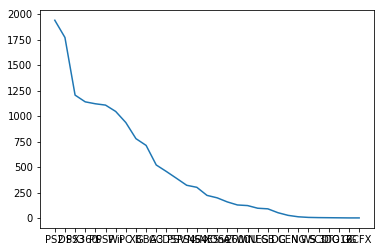

In [13]:
plt.plot(platforms.keys(), platforms.values())

<b> As you can see the default can be messy. To clear it up lets make it bigger and change to a bar chart </b>

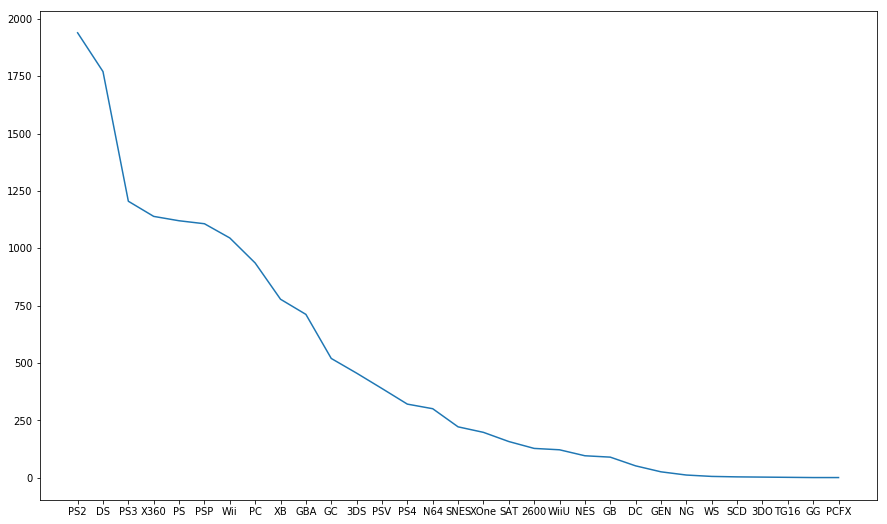

In [14]:
plt.figure(figsize=(15,9))
plt.plot(platforms.keys(), platforms.values())

<b> We've added a parameter for figsize when we initilize the figure. Now its a little easier to read but the chart type still doesn't make sense</b>

<BarContainer object of 31 artists>

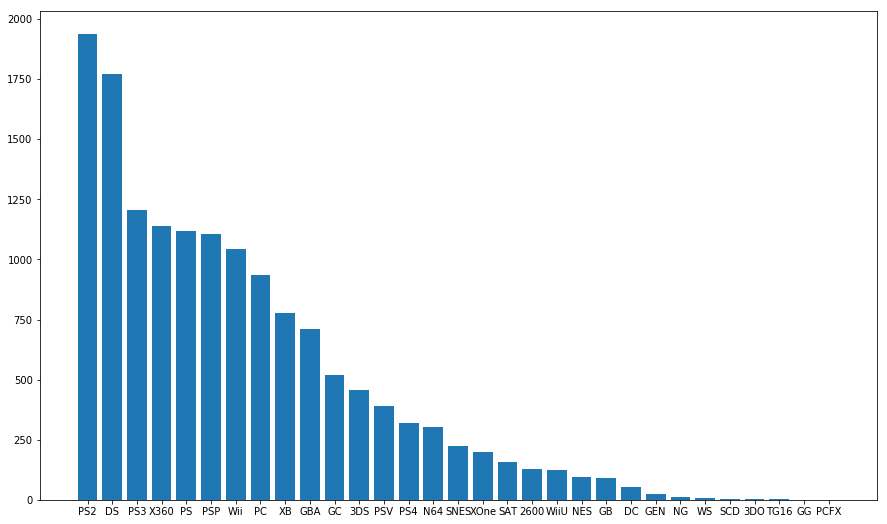

In [15]:
plt.figure(figsize=(15,9))
plt.bar(platforms.keys(), platforms.values())

<b> Great, now we can see the data and understand it effectively. By creating multiple charts and comparing variables we can start to draw greater meaning from the data and help us make a discovery </b>

In [16]:
platform = []
popularity = []
numberOfPlatforms = 9

for key in sorted(platforms, key=platforms.get, reverse=True):
    platform.append(key)
    popularity.append(platforms.get(key))
    
platform_sample = platform[0:numberOfPlatforms]
popularity_sample = popularity[0:numberOfPlatforms]

print(platform_sample)
print(popularity_sample)

['PS2', 'DS', 'PS3', 'X360', 'PS', 'PSP', 'Wii', 'PC', 'XB']
[1939, 1770, 1205, 1139, 1120, 1107, 1045, 936, 778]


<b> Before moving onto the next visualisation I'm sorting the keys/values we have for each platform and splitting these into lists. This way I can get the data for the 9 most popular platforms which will help simplify the chart </b>

In [17]:
other = 0
for i in range(numberOfPlatforms, len(popularity)):
    other += popularity[i]
platform_sample.append("Other")
popularity_sample.append(other)

print(platform_sample)
print(popularity_sample)

['PS2', 'DS', 'PS3', 'X360', 'PS', 'PSP', 'Wii', 'PC', 'XB', 'Other']
[1939, 1770, 1205, 1139, 1120, 1107, 1045, 936, 778, 3820]


<b> I'm also including a loop to sum all other items not included in these lists, which is named the "Other" category. This is important to reflect the fact that there are more than 9 platforms </b>

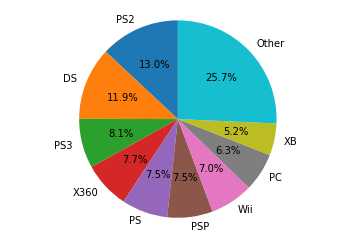

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(popularity_sample, labels=platform_sample, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<b> Now we have a pie chart the accurately reflects our data, with some summarisation in the "other" category. <br><br> For a challenge, when you've got a better understadning of pandas, try creating dataframes for different years and build a chart to compare how popular certain gaming platforms were in each year side-by-side</b>

# What else should you include in your notebook

<ul>
    <li>More advanced visualisations; There are more more effective and advanced charts to use in matplotlib and seaborn </li>
    <li>Extra datasets; Gather more insight and collect more data to build a greater understanding in your analysis </li>
    <li>Look from a different angle; Analyse all relevant data you have in several different ways and think outisde the box to make a useful discovery </li>
    <li>Consider using machine learning; Use machine learning to build a model which can use your analysis to predict future trends </li>
</ul>

<b> Don't worry about this too much yet, we'll cover all of this throughout the course. For now get more familiar with python and begin learning pandas and then matplotlib/seaborn </b>

In [22]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

<BarContainer object of 14859 artists>

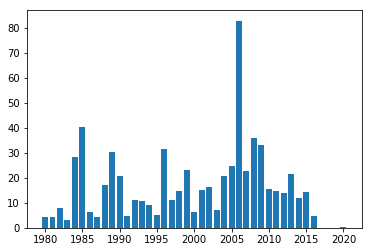

In [72]:
plt.bar(df.Year, df.Global_Sales)

In [116]:
publishers = df.groupby("Publisher").Global_Sales.sum().nlargest(10).reset_index()
publishers.set_index('Publisher')

,Global_Sales
Publisher,
Nintendo,1605.89
Electronic Arts,1085.37
Activision,650.91
Sony Computer Entertainment,526.70
Take-Two Interactive,388.96
Ubisoft,377.19
THQ,317.09
Konami Digital Entertainment,265.02
Sega,252.78


In [117]:
publishersMostGames = df.groupby("Publisher").Global_Sales.count().nlargest(10).reset_index()
publishersMostGames.columns
publishersMostGames = publishersMostGames.rename(columns={'Global_Sales': "No. of Games"})
publishersMostGames.set_index('Publisher')

,No. of Games
Publisher,
Electronic Arts,1305
Activision,872
Namco Bandai Games,835
Ubisoft,770
Konami Digital Entertainment,755
THQ,649
Nintendo,603
Sega,577
Sony Computer Entertainment,555


In [121]:
dfGames = publishersMostGames.merge(publishers, left_on='Publisher', right_on='Publisher', how='inner')

In [122]:
dfGames

,Publisher,No. of Games,Global_Sales
0,Electronic Arts,1305,1085.37
1,Activision,872,650.91
2,Namco Bandai Games,835,224.54
3,Ubisoft,770,377.19
4,Konami Digital Entertainment,755,265.02
5,THQ,649,317.09
6,Nintendo,603,1605.89
7,Sega,577,252.78
8,Sony Computer Entertainment,555,526.70
9,Take-Two Interactive,386,388.96


In [124]:
dfGames['Average_Games'] = dfGames['Global_Sales']/dfGames['No. of Games']

In [125]:
dfGames

,Publisher,No. of Games,Global_Sales,Average_Games
0,Electronic Arts,1305,1085.37,0.831701
1,Activision,872,650.91,0.746456
2,Namco Bandai Games,835,224.54,0.268910
3,Ubisoft,770,377.19,0.489857
4,Konami Digital Entertainment,755,265.02,0.351020
5,THQ,649,317.09,0.488582
6,Nintendo,603,1605.89,2.663167
7,Sega,577,252.78,0.438094
8,Sony Computer Entertainment,555,526.70,0.949009
9,Take-Two Interactive,386,388.96,1.007668


<BarContainer object of 10 artists>

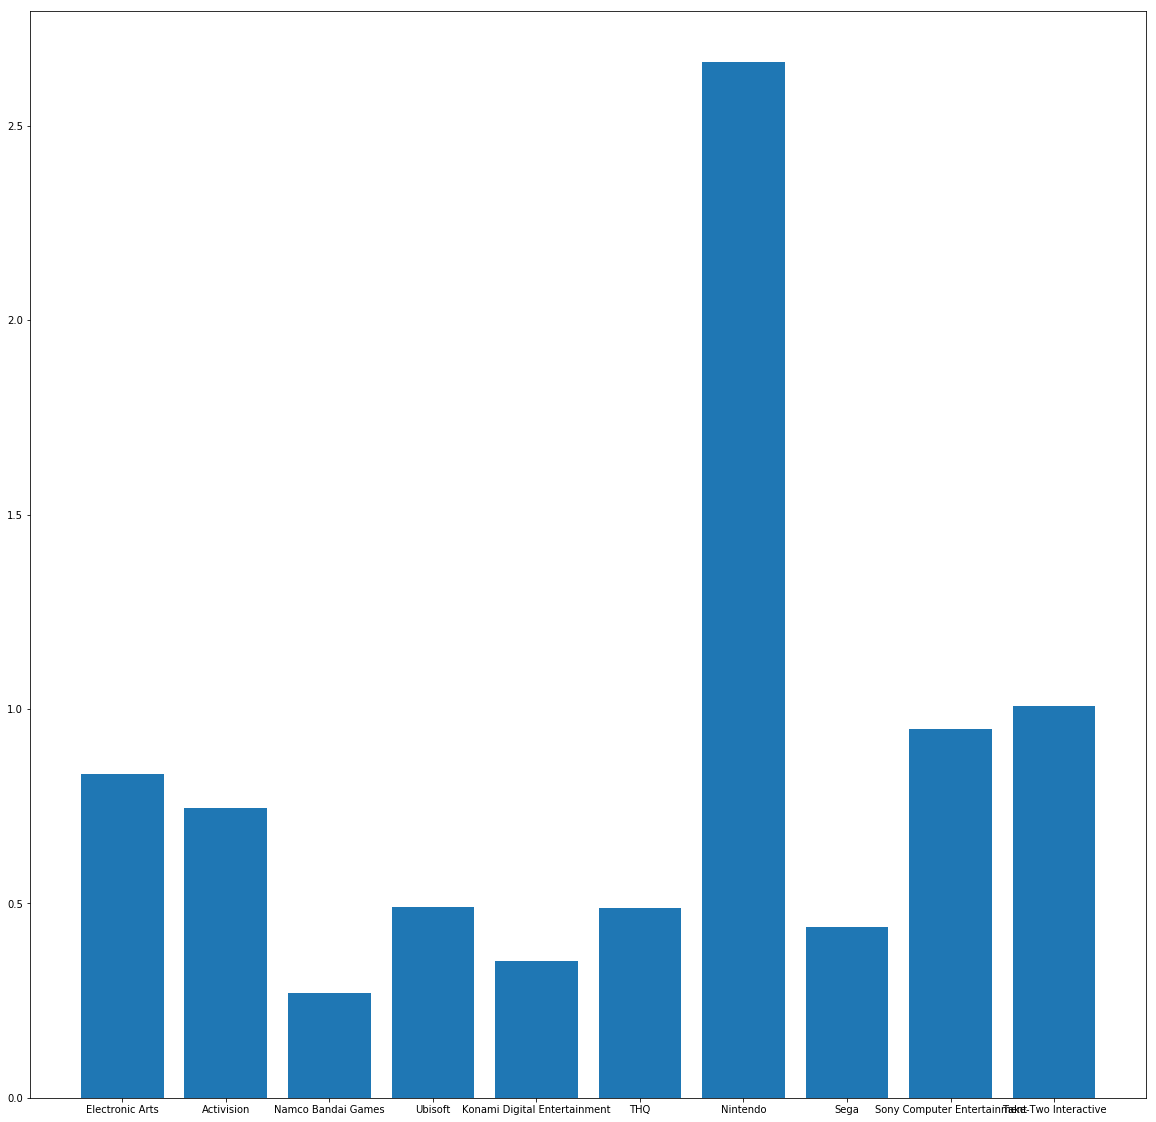

In [133]:
plt.figure(figsize=(20,20))
plt.bar(dfGames.Publisher, dfGames.Average_Games)

In [134]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [137]:
nintendo = df[df.Publisher == "Nintendo"]7

Rank            603
Name            603
Platform        603
Year            596
Genre           603
Publisher       603
NA_Sales        603
EU_Sales        603
JP_Sales        603
Other_Sales     603
Global_Sales    603
dtype: int64